In [1]:
from pyscripts.shp_utils import get_region_and_profile_to_merge, load_shape_file_into_gdf, get_bbox_and_transform, plot_profile_with_regions, add_zone_names_to_ecoregions
import os
from pathlib import Path
import matplotlib.pyplot as plt

d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


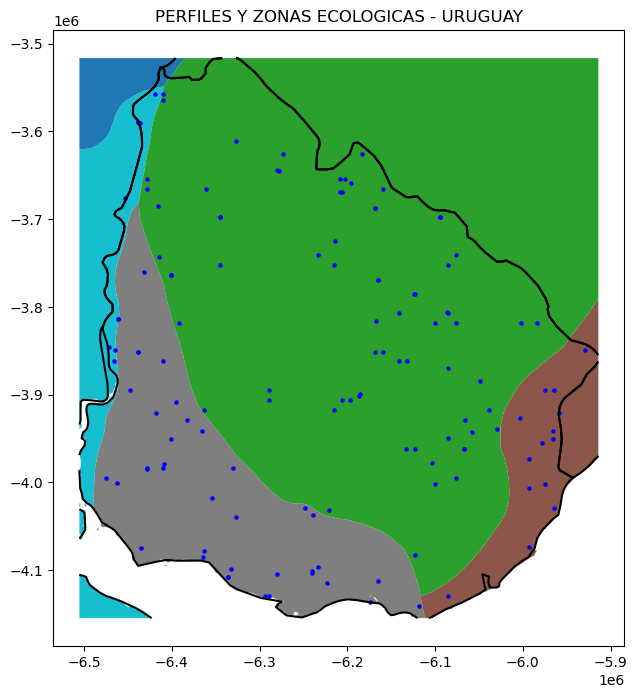

In [18]:
shapes_df, profiles_gdf = get_region_and_profile_to_merge('Uruguay', 'sa_eco_l3')
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(15,8))
base = shapes_df.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(column='LEVEL3', ax = ax)
# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=5)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("PERFILES Y ZONAS ECOLOGICAS - URUGUAY")
plt.show()



d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


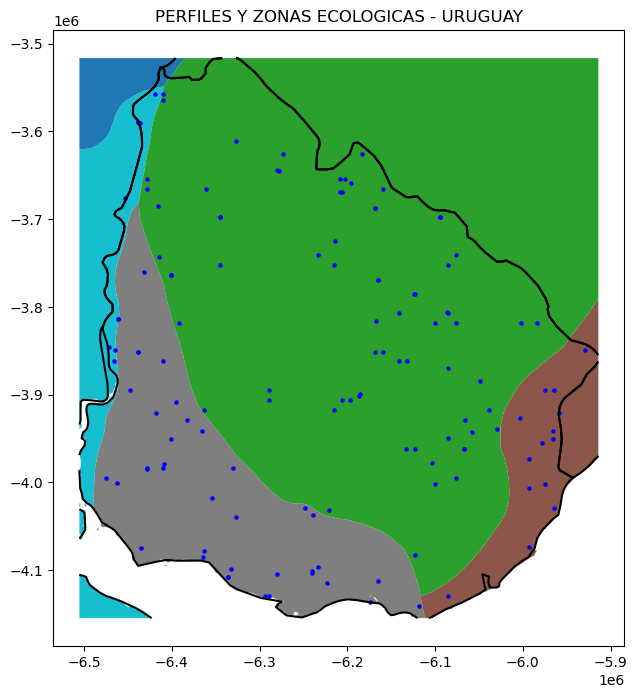

In [2]:
plot_profile_with_regions('Uruguay', 'sa_eco_l3', 'LEVEL3', "PERFILES Y ZONAS ECOLOGICAS - URUGUAY")

In [2]:
gdf = load_shape_file_into_gdf('zonas_suelo_uy')
gdf

,ID,GEOFORMA,geometry
0,3,Retroceso del frente de Cuesta,"POLYGON ((-6248464.212 -3595696.360, -6247590...."
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189...."
2,8,Fosa Tectonica del Santa Lucia,"POLYGON ((-6160870.454 -4050087.038, -6159894...."
3,6,Región Centro Sur,"POLYGON ((-6398381.991 -4055525.165, -6400055...."
4,10,Colinas y Lomas del Este,"MULTIPOLYGON (((-5993181.138 -4014972.518, -59..."
5,9,Sistema de Planicies y Fosa de la L. Merin,"MULTIPOLYGON (((-6393982.052 -3904765.090, -63..."
6,5,Cuenca Sedimentaria del Litoral Oeste,"MULTIPOLYGON (((-6471586.131 -3786564.092, -64..."
7,2,Cuenca Sedimentaria del Noreste,"MULTIPOLYGON (((-6192073.294 -3707990.995, -61..."
8,1,Cuesta Basaltica,"MULTIPOLYGON (((-6373041.372 -3909347.133, -63..."
9,11,Agua,"POLYGON ((-6221122.829 -3833960.236, -6220621...."


d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


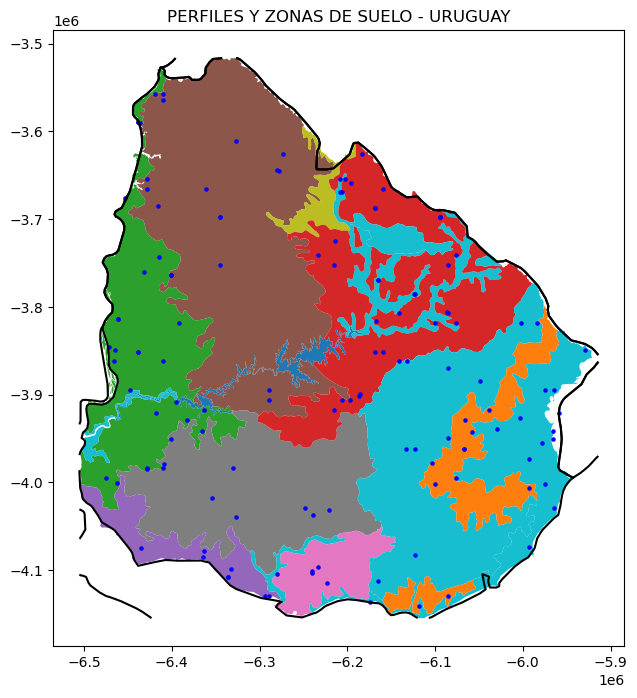

In [4]:
plot_profile_with_regions('Uruguay', 'zonas_suelo_uy', 'GEOFORMA', "PERFILES Y ZONAS DE SUELO - URUGUAY", to_file=True)

In [8]:
shapes_df, profiles_gdf = get_region_and_profile_to_merge('Uruguay', 'zonas_suelo_uy')
profile_regions = shapes_df.sjoin(profiles_gdf, predicate='contains')

In [9]:
profile_regions

,ID,GEOFORMA,geometry,index_right,profile_id,country_name,bdfi33_pond_val,clay_pond_val,orgc_pond_val,latitude,longitude,bd_0_30_soilgrids
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",36,68657,Uruguay,NaN,24.67,31.75,-34.750000,-56.533333,1.36
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",113,70847,Uruguay,NaN,26.14,39.53,-34.590000,-56.919722,1.48
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",114,70849,Uruguay,NaN,10.77,20.37,-34.590000,-56.919722,1.48
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",111,70845,Uruguay,NaN,41.00,19.66,-34.520000,-56.889722,1.51
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",130,71450,Uruguay,NaN,37.07,31.74,-34.419722,-57.169722,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...
10,4,Sierras del Este e Isla Cristalina de Rivera,"MULTIPOLYGON (((-6053449.076 -3752761.512, -60...",100,70519,Uruguay,NaN,9.60,16.80,-33.500000,-55.000000,1.43
10,4,Sierras del Este e Isla Cristalina de Rivera,"MULTIPOLYGON (((-6053449.076 -3752761.512, -60...",109,70809,Uruguay,NaN,16.00,11.66,-33.500000,-55.099722,1.42
10,4,Sierras del Este e Isla Cristalina de Rivera,"MULTIPOLYGON (((-6053449.076 -3752761.512, -60...",118,70855,Uruguay,NaN,12.13,15.66,-33.409722,-54.659722,1.45
10,4,Sierras del Este e Isla Cristalina de Rivera,"MULTIPOLYGON (((-6053449.076 -3752761.512, -60...",43,68664,Uruguay,NaN,35.63,44.37,-32.916667,-54.333333,1.44


In [10]:
profile_regions[['GEOFORMA', 'profile_id', 'clay_pond_val', 'orgc_pond_val', 'bdfi33_pond_val', 'bd_0_30_soilgrids']] \
                .groupby('GEOFORMA').agg({'profile_id':'count',
                                         'clay_pond_val':['mean', 'std'],
                                         'orgc_pond_val':['mean', 'std'],
                                         'bdfi33_pond_val':['mean', 'std'],
                                         'bd_0_30_soilgrids':['mean', 'std']})

profile_id clay_pond_val  \
                                                  count          mean   
GEOFORMA                                                                
Agua                                                  2     35.435000   
Colinas y Lomas del Este                             11     27.334545   
Cuenca Sedimentaria del Litoral Oeste                23     26.042609   
Cuenca Sedimentaria del Noreste                      30     22.962069   
Cuenca Sedimentaria del Suroeste                      7     29.917143   
Cuesta Basaltica                                     18     31.134444   
Fosa Tectonica del Santa Lucia                        5     54.246000   
Región Centro Sur                                     8     32.942500   
Sierras del Este e Isla Cristalina de Rivera         10     20.582222   
Sistema de Planicies y Fosa de la L. Merin           15     20.426667   

                                                        orgc_pond_val  \
                                                    std          mean   
GEOFORMA                                                                
Agua                                          17.769593     28.430000   
Colinas y Lomas del Este                       6.471785     20.857273   
Cuenca Sedimentaria del Litoral Oeste         14.082095     19.637391   
Cuenca Sedimentaria del Noreste               12.289005     17.811333   
Cuenca Sedimentaria del Suroeste              10.262904     27.320000   
Cuesta Basaltica                              20.003954     21.557647   
Fosa Tectonica del Santa Lucia                36.296967     27.122000   
Región Centro Sur                             10.061333     26.615000   
Sierras del Este e Isla Cristalina de Rivera  11.824783     17.612000   
Sistema de Planicies y Fosa de la L. Merin    10.715424     41.120667   

                                                         bdfi33_pond_val  \
                                                     std            mean   
GEOFORMA                                                                   
Agua                                           13.534024             NaN   
Colinas y Lomas del Este                        4.027292        1.500000   
Cuenca Sedimentaria del Litoral Oeste          10.248425        0.747500   
Cuenca Sedimentaria del Noreste                10.062028        1.455000   
Cuenca Sedimentaria del Suroeste                7.656435        3.040000   
Cuesta Basaltica                               16.756781        1.023333   
Fosa Tectonica del Santa Lucia                 20.473001        2.230000   
Región Centro Sur                               9.598701        2.560000   
Sierras del Este e Isla Cristalina de Rivera   11.000005        1.480000   
Sistema de Planicies y Fosa de la L. Merin    100.187583        1.680000   

                                                       bd_0_30_soilgrids  \
                                                   std              mean   
GEOFORMA                                                                   
Agua                                               NaN          0.755000   
Colinas y Lomas del Este                           NaN          1.447273   
Cuenca Sedimentaria del Litoral Oeste         0.867386          1.443913   
Cuenca Sedimentaria del Noreste               0.172337          1.479000   
Cuenca Sedimentaria del Suroeste                   NaN          1.488571   
Cuesta Basaltica                              0.085049          1.493889   
Fosa Tectonica del Santa Lucia                     NaN          1.516000   
Región Centro Sur                                  NaN          1.485000   
Sierras del Este e Isla Cristalina de Rivera       NaN          1.405000   
Sistema de Planicies y Fosa de la L. Merin         NaN          1.410667   

                                                        
                                                   std  
GEOFORMA                                             

# Cruzando zonas ecologicas con suelos

In [22]:
def annotate_zone_names(df, axis):
    if str(df['LEVEL2']) == '23.1':
        return axis.annotate(text=df['zone_name'], xy=df.geometry.centroid.coords[0], ha='center', bbox=dict(facecolor='wheat', edgecolor='black', pad=0.5, boxstyle='round'))
    else:
        return None

d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


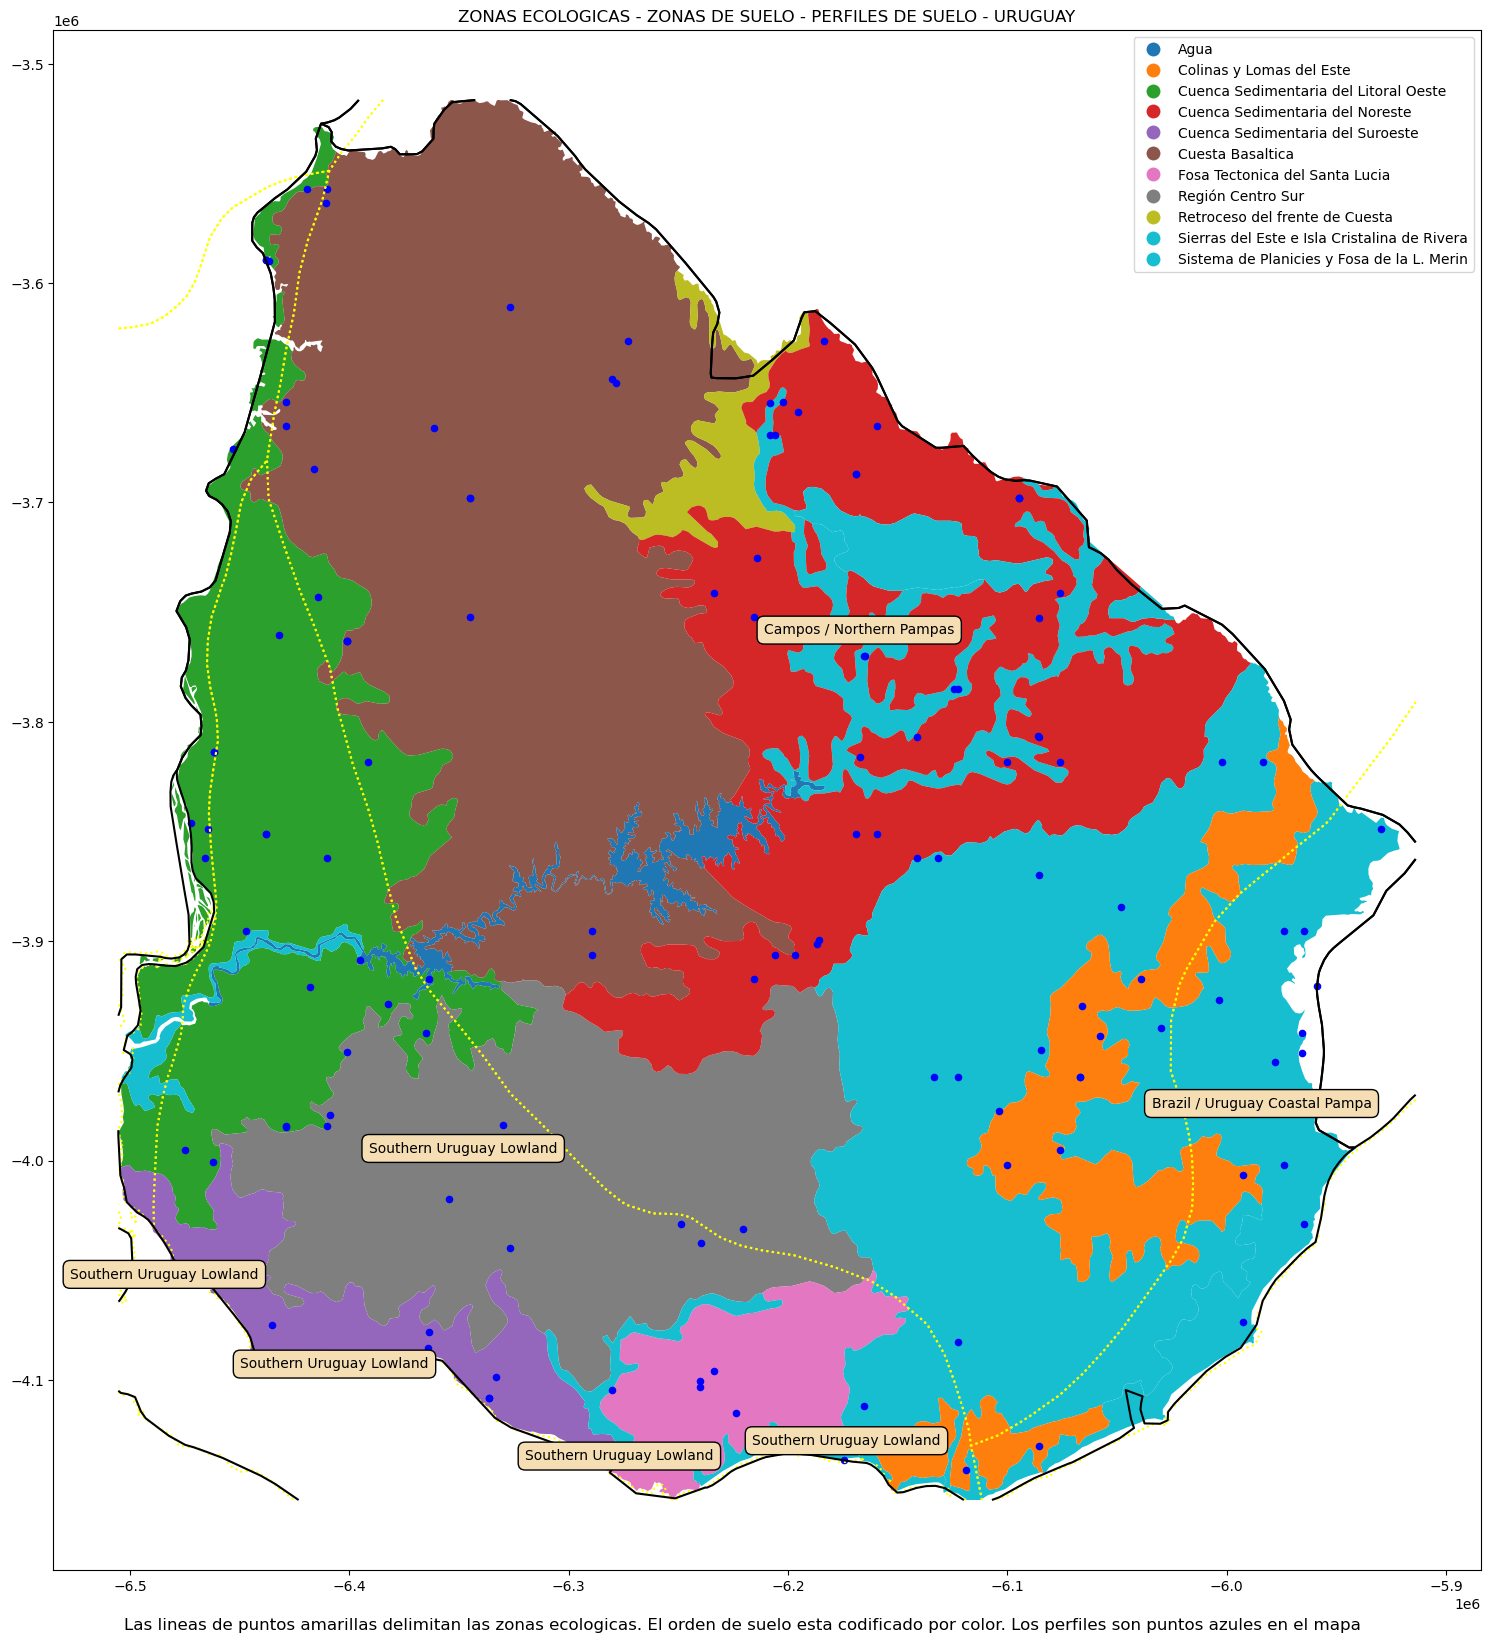

In [23]:
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(20,20))
base = gdf_suelos.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(column='GEOFORMA', ax = ax, legend='GEOFORMA')

gdf_eco.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='yellow', ls=':')

gdf_eco.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])) \
                .apply(annotate_zone_names, args=(base,), axis=1)

# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=20)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("ZONAS ECOLOGICAS - ZONAS DE SUELO - PERFILES DE SUELO - URUGUAY")

txt="Las lineas de puntos amarillas delimitan las zonas ecologicas. El orden de suelo esta codificado por color. Los perfiles son puntos azules en el mapa"
plt.figtext(0.5, 0.08, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(os.path.join('output/PERFILES CON ZONAS DE SUELO Y ECOLOGICAS - URUGUAY.png'))

d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


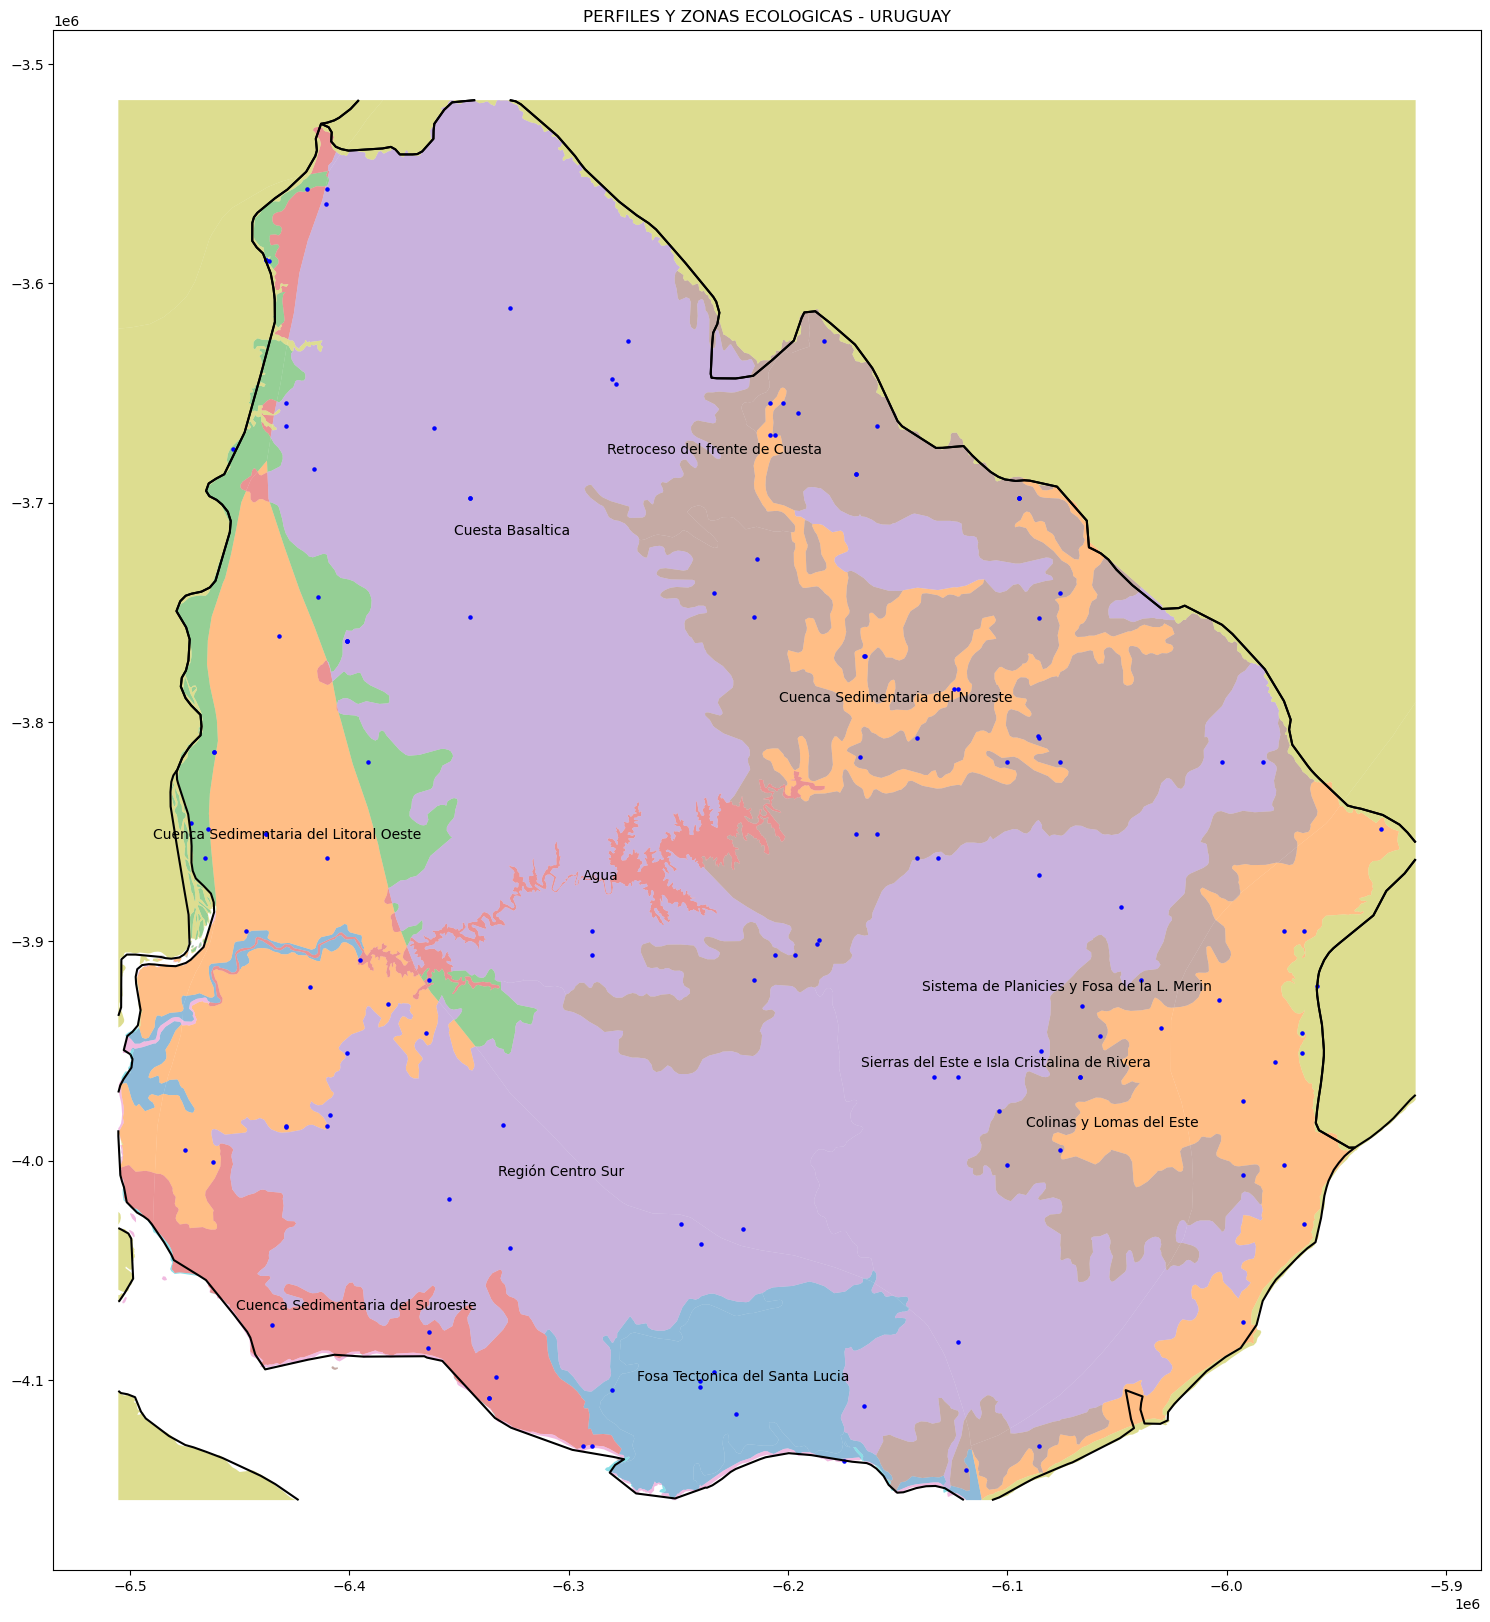

In [44]:
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(20,20))

res_union = gdf_eco.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).overlay(gdf_suelos.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])), how='union')
base = res_union.plot(alpha=0.5, cmap='tab10', ax=ax)

gdf_suelos.apply(lambda x: base.annotate(text=x['GEOFORMA'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=5)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("PERFILES Y ZONAS ECOLOGICAS - URUGUAY")
plt.show()

# Resumen de perfiles en zonas

In [33]:
gdf_eco

,AREA,PERIMETER,SA_ECO_ALB,SA_ECO_A_1,LEVEL3,LEVEL2,LEVEL1,Shape_Leng,Shape_Area,geometry,level,zone_name
0,1.807720e+06,6852.72,2,2,16.1.1,16.1,16,6.852716e+03,1.807722e+06,"POLYGON ((-8720656.388 3150681.035, -8721114.0...",16.1.1,Bahamas
1,5.750910e+05,3528.49,3,3,16.1.1,16.1,16,3.528488e+03,5.750906e+05,"POLYGON ((-8718599.338 3150123.543, -8719313.6...",16.1.1,Bahamas
2,8.309400e+05,6550.06,4,4,16.1.1,16.1,16,6.550065e+03,8.309403e+05,"POLYGON ((-8711778.752 3146834.784, -8712921.8...",16.1.1,Bahamas
3,2.268020e+06,8768.95,5,5,16.1.1,16.1,16,8.768953e+03,2.268015e+06,"POLYGON ((-8692280.388 3137047.939, -8692880.1...",16.1.1,Bahamas
4,2.132550e+06,7619.32,6,8,16.1.1,16.1,16,7.619325e+03,2.132549e+06,"POLYGON ((-8652987.468 3128291.714, -8653382.4...",16.1.1,Bahamas
...,...,...,...,...,...,...,...,...,...,...,...,...
3503,2.094940e+10,923655.00,2690,2745,24.2.3,24.2,24,9.236554e+05,2.094940e+10,"POLYGON ((-8027297.126 -6660834.731, -8011634....",24.2.3,Magellan Grasslands
3504,2.234300e+10,1136780.00,2948,2874,24.2.3,24.2,24,1.136778e+06,2.234297e+10,"POLYGON ((-7791278.022 -7116020.671, -7790147....",24.2.3,Magellan Grasslands
3505,4.117020e+07,33585.40,3054,2975,24.2.3,24.2,24,3.358536e+04,4.117020e+07,"POLYGON ((-7879534.756 -6966739.997, -7880323....",24.2.3,Magellan Grasslands
3506,7.603690e+05,4062.69,3080,2996,24.2.3,24.2,24,4.062688e+03,7.603687e+05,"POLYGON ((-7858110.392 -6968924.957, -7858512....",24.2.3,Magellan Grasslands


d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

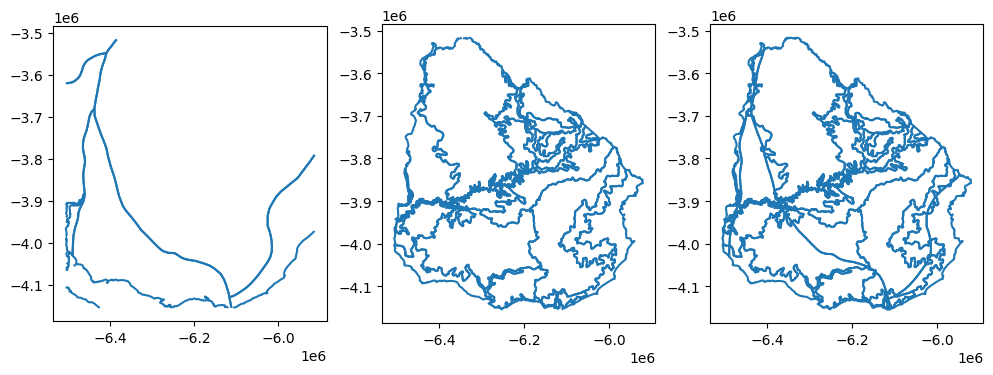

In [3]:

bbox = get_bbox_and_transform('UY')
gdf_eco_no_names = load_shape_file_into_gdf('sa_eco_l3')
gdf_eco = add_zone_names_to_ecoregions(gdf_eco_no_names)
gdf_suelos, profiles_gdf = get_region_and_profile_to_merge('Uruguay', 'zonas_suelo_uy')

#for p in ['covers', 'within', None, 'intersects', 'touches', 'contains_properly', 'crosses', 'contains', 'overlaps']:
# .rename({'index_right':'index_eco'}, axis=1).reset_index()
gdf_zones = gdf_suelos.overlay(gdf_eco.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])))

fig, axes = plt.subplots(1,3, figsize=(12,8))
gdf_eco.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = axes[0])
gdf_suelos.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = axes[1])
gdf_zones.boundary.plot(ax = axes[2])


In [4]:
profile_zones = gdf_zones.sjoin(profiles_gdf, predicate='contains')

group_profile_zones = profile_zones[['GEOFORMA', 'zone_name', 'profile_id', 'clay_pond_val', 'orgc_pond_val', 'bdfi33_pond_val', 'bd_0_30_soilgrids']] \
                .groupby(['GEOFORMA', 'zone_name']).agg({'profile_id':'count',
                                         'clay_pond_val':['mean', 'std'],
                                         'orgc_pond_val':['mean', 'std'],
                                         'bdfi33_pond_val':['mean', 'std'],
                                         'bd_0_30_soilgrids':['mean', 'std']})
group_profile_zones

profile_id  \
                                                                                 count   
GEOFORMA                                     zone_name                                   
Agua                                         Campos / Northern Pampas                1   
                                             Southern Uruguay Lowland                1   
Colinas y Lomas del Este                     Brazil / Uruguay Coastal Pampa          2   
                                             Campos / Northern Pampas                8   
                                             Southern Uruguay Lowland                1   
Cuenca Sedimentaria del Litoral Oeste        Campos / Northern Pampas                2   
                                             La Plata / Uruguay Lowland              8   
                                             Southern Uruguay Lowland               13   
Cuenca Sedimentaria del Noreste              Campos / Northern Pampas               30   
Cuenca Sedimentaria del Suroeste             Southern Uruguay Lowland                7   
Cuesta Basaltica                             Campos / Northern Pampas               18   
Fosa Tectonica del Santa Lucia               Southern Uruguay Lowland                5   
Región Centro Sur                            Campos / Northern Pampas                1   
                                             Southern Uruguay Lowland                7   
Sierras del Este e Isla Cristalina de Rivera Campos / Northern Pampas                9   
                                             Southern Uruguay Lowland                1   
Sistema de Planicies y Fosa de la L. Merin   Brazil / Uruguay Coastal Pampa          9   
                                             Campos / Northern Pampas                6   

                                                                            clay_pond_val  \
                                                                                     mean   
GEOFORMA                                     zone_name                                      
Agua                                         Campos / Northern Pampas           22.870000   
                                             Southern Uruguay Lowland           48.000000   
Colinas y Lomas del Este                     Brazil / Uruguay Coastal Pampa     24.665000   
                                             Campos / Northern Pampas           26.418750   
                                             Southern Uruguay Lowland           40.000000   
Cuenca Sedimentaria del Litoral Oeste        Campos / Northern Pampas           16.290000   
                                             La Plata / Uruguay Lowland         29.738750   
                                             Southern Uruguay Lowland           25.268462   
Cuenca Sedimentaria del Noreste              Campos / Northern Pampas           22.962069   
Cuenca Sedimentaria del Suroeste             Southern Uruguay Lowland           29.917143   
Cuesta Basaltica                             Campos / Northern Pampas           31.134444   
Fosa Tectonica del Santa Lucia               Southern Uruguay Lowland           54.246000   
Región Centro Sur                            Campos / Northern Pampas           15.390000   
                                             Southern Uruguay Lowland           35.450000   
Sierras del Este e Isla Cristalina de Rivera Campos / Northern Pampas           20.582222   
                                             Southern Uruguay Lowland                 NaN   
Sistema de Planicies y Fosa de la L. Merin   Brazil / Uruguay Coastal Pampa     16.714444   
                                             Campos / Northern Pampas           25.995000   

                                                                                        \
                                                                                   std   
GEOFORMA                                     zone_n

In [79]:
group_profile_zones.reset_index()

GEOFORMA  \
                                                   
0                                           Agua   
1                                           Agua   
2                       Colinas y Lomas del Este   
3                       Colinas y Lomas del Este   
4                       Colinas y Lomas del Este   
5          Cuenca Sedimentaria del Litoral Oeste   
6          Cuenca Sedimentaria del Litoral Oeste   
7          Cuenca Sedimentaria del Litoral Oeste   
8                Cuenca Sedimentaria del Noreste   
9               Cuenca Sedimentaria del Suroeste   
10                              Cuesta Basaltica   
11                Fosa Tectonica del Santa Lucia   
12                             Región Centro Sur   
13                             Región Centro Sur   
14  Sierras del Este e Isla Cristalina de Rivera   
15  Sierras del Este e Isla Cristalina de Rivera   
16    Sistema de Planicies y Fosa de la L. Merin   
17    Sistema de Planicies y Fosa de la L. Merin   

                         zone_name profile_id clay_pond_val             \
                                        count          mean        std   
0         Campos / Northern Pampas          1     22.870000        NaN   
1         Southern Uruguay Lowland          1     48.000000        NaN   
2   Brazil / Uruguay Coastal Pampa          2     24.665000   8.011520   
3         Campos / Northern Pampas          8     26.418750   4.975361   
4         Southern Uruguay Lowland          1     40.000000        NaN   
5         Campos / Northern Pampas          2     16.290000   5.006316   
6       La Plata / Uruguay Lowland          8     29.738750  16.288623   
7         Southern Uruguay Lowland         13     25.268462  13.457067   
8         Campos / Northern Pampas         30     22.962069  12.289005   
9         Southern Uruguay Lowland          7     29.917143  10.262904   
10        Campos / Northern Pampas         18     31.134444  20.003954   
11        Southern Uruguay Lowland          5     54.246000  36.296967   
12        Campos / Northern Pampas          1     15.390000        NaN   
13        Southern Uruguay Lowland          7     35.450000   7.708327   
14        Campos / Northern Pampas          9     20.582222  11.824783   
15        Southern Uruguay Lowland          1           NaN        NaN   
16  Brazil / Uruguay Coastal Pampa          9     16.714444  12.020131   
17        Campos / Northern Pampas          6     25.995000   5.320762   

   orgc_pond_val             bdfi33_pond_val           bd_0_30_soilgrids  \
            mean         std            mean       std              mean   
0      18.860000         NaN             NaN       NaN          1.510000   
1      38.000000         NaN             NaN       NaN          0.000000   
2      18.080000    3.422397             NaN       NaN          1.345000   
3      22.183750    3.691674        1.500000       NaN          1.486250   
4      15.800000         NaN             NaN       NaN          1.340000   
5      13.580000    2.503158        1.600000       NaN          1.515000   
6      18.238750    9.459972        0.000000       NaN          1.316250   
7      21.430000   11.354710        0.695000  0.982878          1.511538   
8      17.811333   10.062028        1.455000  0.172337          1.479000   
9      27.320000    7.656435        3.040000       NaN          1.488571   
10     21.557647   16.756781        1.023333  0.085049          1.493889   
11     27.122000   20.473001        2.230000       NaN          1.516000   
12     12.820000         NaN             NaN       NaN          1.470000   
13     28.585714    8.440551        2.560000       NaN          1.487143   
14     19.376667   10.054455        1.480000       NaN          1.410000   
15      1.730000         NaN             NaN       NaN          1.360000   
16     56.445556  129.907608        1.680000       NaN          1.353333   
17     18.133333    6.836030             NaN       NaN          1.496667  

In [5]:
group_profile_zones.to_excel('output/profile_zones_Uruguay.xlsx')